In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
print('done!')

done!


In [2]:
train = pd.read_csv(r"C:\Users\vedan\Downloads\train(1).csv")
test = pd.read_csv(r"C:\Users\vedan\Downloads\test.csv") #we are not gonna use this, later, we will split the 'train' dataframe to test and train sets.
test.set_index("PassengerId",inplace = True)
dfp = train
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


a lot of ages are missing- have to think of a strat to fill in ages. is age related to anything?

Text(0, 0.5, 'Age')

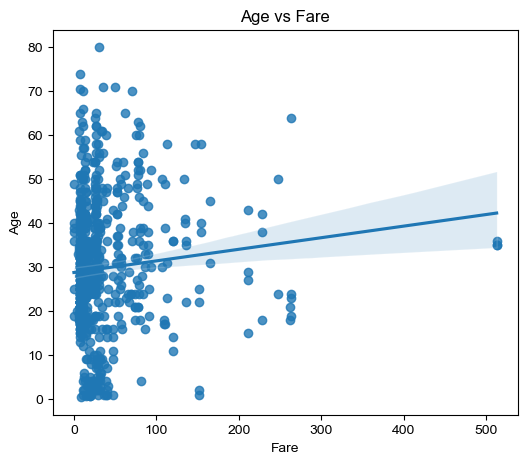

In [4]:
plt.figure(figsize=(6,5))
sns.regplot(y='Age',x='Fare',data=train)
sns.set_style('dark')
plt.title('Age vs Fare')
plt.xlabel('Fare')
plt.ylabel('Age')

very weak, in such a case, rather than shooting arrows in the dark, id rather just drop missing ages later on.

In [5]:
train = pd.concat([train,pd.get_dummies(train['Sex'],prefix="sex").astype(int)],axis=1)
train = pd.concat([train,pd.get_dummies(train['Embarked'],prefix="Port").astype(int)],axis=1)
train = pd.concat([train,pd.get_dummies(train['Pclass'],prefix="class").astype(int)],axis=1)

train.drop(columns = ['Sex','Embarked','Pclass'],inplace = True)

train

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,sex_female,sex_male,Port_C,Port_Q,Port_S,class_1,class_2,class_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,0,1,0,0,1,0,1,0
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,1,0,0,0,1,1,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,1,0,0,0,1,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,0,1,1,0,0,1,0,0


regplot between Survival and Fare, it isnt definite but it shows a rough correlation b/w survival and rate 

Text(0, 0.5, 'Survived?')

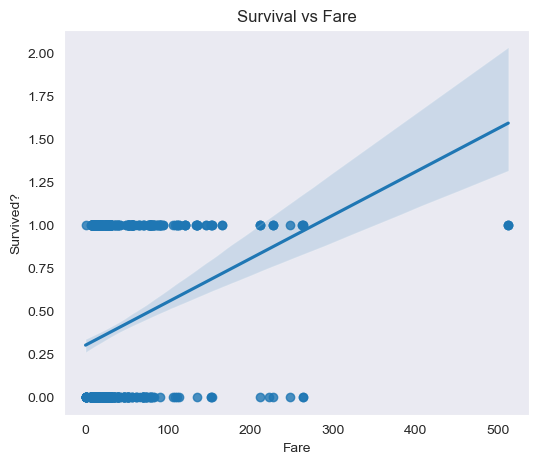

In [6]:
plt.figure(figsize=(6,5))
sns.regplot(y='Survived',x='Fare',data=train)
sns.set_style('dark')
plt.title('Survival vs Fare')
plt.xlabel('Fare')
plt.ylabel('Survived?')

are fare and class corellated? are fare and port correlated? are port and class correlated?

Text(0, 0.5, 'Fare')

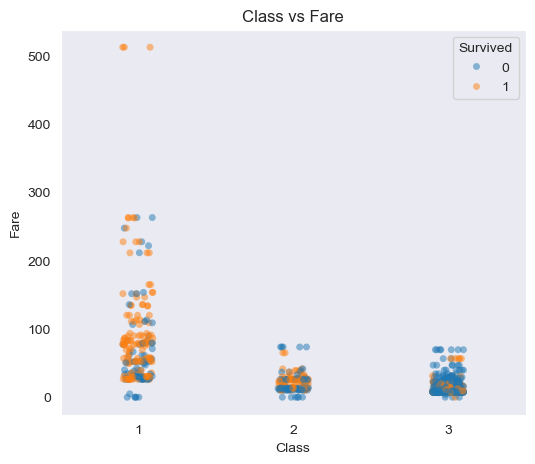

In [7]:
plt.figure(figsize=(6,5))
sns.stripplot(y='Fare',x='Pclass',data=dfp,hue='Survived',alpha = 0.5)
sns.set_style('dark')
plt.title('Class vs Fare')
plt.xlabel('Class')
plt.ylabel('Fare')

outliers in first class, remove missing ages.

In [8]:
train = train[train['Fare'] < 300]
train = train.dropna(subset=['Age'])
print('Done!')

Done!


In [9]:
train.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,sex_female,sex_male,Port_C,Port_Q,Port_S,class_1,class_2,class_3
count,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,448.116737,0.403657,29.675345,0.514768,0.431786,32.679178,0.365682,0.634318,0.178622,0.039381,0.779184,0.257384,0.243319,0.499297
std,259.195655,0.490976,14.552495,0.931147,0.854517,42.944479,0.481960,0.481960,0.383305,0.194637,0.415089,0.437500,0.429388,0.500351
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,221.500000,0.000000,20.000000,0.000000,0.000000,8.050000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,444.000000,0.000000,28.000000,0.000000,0.000000,15.550000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,676.500000,1.000000,38.000000,1.000000,1.000000,32.750000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,891.000000,1.000000,80.000000,5.000000,6.000000,263.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


a longer name often means an important person- we need to make a new column with name length.

In [10]:
dfp['NLength'] = dfp['Name'].apply(len)

Text(0, 0.5, 'Survived?')

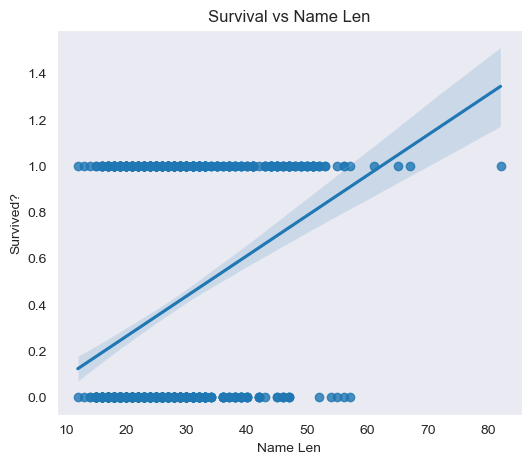

In [11]:
plt.figure(figsize=(6,5))
sns.regplot(y='Survived',x='NLength',data=dfp)
sns.set_style('dark')
plt.title('Survival vs Name Len')
plt.xlabel('Name Len')
plt.ylabel('Survived?')

strong. damn

In [12]:
train['NLength'] = train['Name'].apply(len)

In [13]:
train

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,sex_female,sex_male,Port_C,Port_Q,Port_S,class_1,class_2,class_3,NLength
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,0,0,1,23
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,0,51
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,0,0,1,22
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1,0,0,44
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,0,0,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,"Rice, Mrs. William (Margaret Norton)",39.0,0,5,382652,29.1250,NaN,1,0,0,1,0,0,0,1,36
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,0,1,0,0,1,0,1,0,21
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,1,0,0,0,1,1,0,0,28
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,0,1,1,0,0,1,0,0,21


In [14]:
train.drop(columns = ['PassengerId'],inplace = True)
train

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,sex_female,sex_male,Port_C,Port_Q,Port_S,class_1,class_2,class_3,NLength
0,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,0,0,1,23
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,0,51
2,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,0,0,1,22
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1,0,0,44
4,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,0,0,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,"Rice, Mrs. William (Margaret Norton)",39.0,0,5,382652,29.1250,NaN,1,0,0,1,0,0,0,1,36
886,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,0,1,0,0,1,0,1,0,21
887,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,1,0,0,0,1,1,0,0,28
889,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,0,1,1,0,0,1,0,0,21


array([[<Axes: xlabel='Survived', ylabel='Survived'>,
        <Axes: xlabel='Age', ylabel='Survived'>,
        <Axes: xlabel='SibSp', ylabel='Survived'>,
        <Axes: xlabel='Parch', ylabel='Survived'>,
        <Axes: xlabel='Fare', ylabel='Survived'>,
        <Axes: xlabel='sex_female', ylabel='Survived'>,
        <Axes: xlabel='sex_male', ylabel='Survived'>,
        <Axes: xlabel='Port_C', ylabel='Survived'>,
        <Axes: xlabel='Port_Q', ylabel='Survived'>,
        <Axes: xlabel='Port_S', ylabel='Survived'>,
        <Axes: xlabel='class_1', ylabel='Survived'>,
        <Axes: xlabel='class_2', ylabel='Survived'>,
        <Axes: xlabel='class_3', ylabel='Survived'>,
        <Axes: xlabel='NLength', ylabel='Survived'>],
       [<Axes: xlabel='Survived', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='SibSp', ylabel='Age'>,
        <Axes: xlabel='Parch', ylabel='Age'>,
        <Axes: xlabel='Fare', ylabel='Age'>,
        <Axes: xlabel='sex_female', 

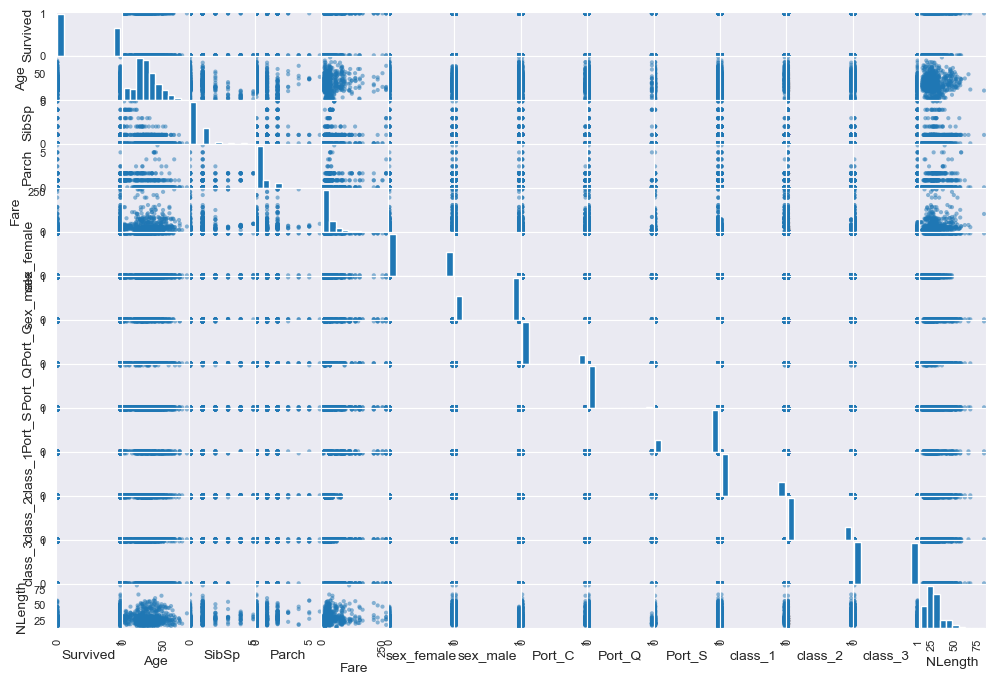

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(train, figsize=(12, 8))

In [16]:
train.drop(columns = ['Name','Ticket','Cabin','Port_S','class_1','sex_female'],inplace = True)
train

,Survived,Age,SibSp,Parch,Fare,sex_male,Port_C,Port_Q,class_2,class_3,NLength
0,0,22.0,1,0,7.2500,1,0,0,0,1,23
1,1,38.0,1,0,71.2833,0,1,0,0,0,51
2,1,26.0,0,0,7.9250,0,0,0,0,1,22
3,1,35.0,1,0,53.1000,0,0,0,0,0,44
4,0,35.0,0,0,8.0500,1,0,0,0,1,24
...,...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,0,0,1,0,1,36
886,0,27.0,0,0,13.0000,1,0,0,1,0,21
887,1,19.0,0,0,30.0000,0,0,0,0,0,28
889,1,26.0,0,0,30.0000,1,1,0,0,0,21


In [17]:
train.corr()['Survived']

Survived    1.000000
Age        -0.079472
SibSp      -0.014598
Parch       0.094258
Fare        0.275122
sex_male   -0.541935
Port_C      0.185123
Port_Q     -0.048673
class_2     0.087969
class_3    -0.334242
NLength     0.309139
Name: Survived, dtype: float64

Text(0, 0.5, 'Survived?')

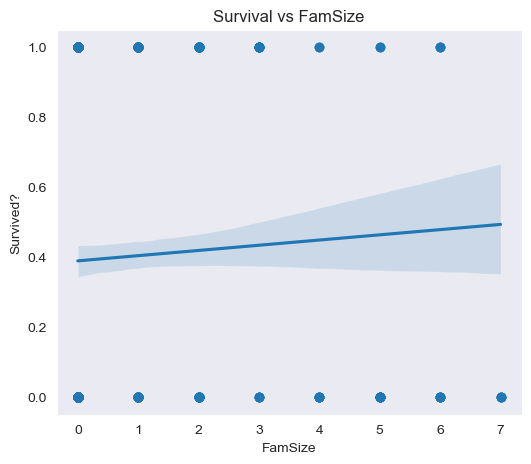

In [18]:
train['FamSize'] = train['Parch'] + train['SibSp']
plt.figure(figsize=(6,5))
sns.regplot(y='Survived',x='FamSize',data=train)
sns.set_style('dark')
plt.title('Survival vs FamSize')
plt.xlabel('FamSize')
plt.ylabel('Survived?')

In [19]:
train

,Survived,Age,SibSp,Parch,Fare,sex_male,Port_C,Port_Q,class_2,class_3,NLength,FamSize
0,0,22.0,1,0,7.2500,1,0,0,0,1,23,1
1,1,38.0,1,0,71.2833,0,1,0,0,0,51,1
2,1,26.0,0,0,7.9250,0,0,0,0,1,22,0
3,1,35.0,1,0,53.1000,0,0,0,0,0,44,1
4,0,35.0,0,0,8.0500,1,0,0,0,1,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,0,0,1,0,1,36,5
886,0,27.0,0,0,13.0000,1,0,0,1,0,21,0
887,1,19.0,0,0,30.0000,0,0,0,0,0,28,0
889,1,26.0,0,0,30.0000,1,1,0,0,0,21,0


In [20]:
from sklearn.model_selection import train_test_split
X = train.drop(columns =['Survived'])
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.feature_selection import f_classif
F, p = f_classif(X_train[['FamSize']], y_train)
print(F, p)

[1.73034119] [0.18889994]


a dud.

In [21]:
F, p = f_classif(X_train[['SibSp']], y_train)
print(F, p)

[0.01988312] [0.88791418]


also meh

In [22]:
F, p = f_classif(X_train[['Parch']], y_train)
print(F, p)

[6.13626618] [0.01353459]


we have something here

i'll drop SibSp

In [23]:
X_train.drop(columns = ['SibSp'],inplace = True)
X_test.drop(columns = ['SibSp'],inplace = True)

In [24]:
X_train

,Age,Parch,Fare,sex_male,Port_C,Port_Q,class_2,class_3,NLength,FamSize
472,33.0,2,27.7500,0,0,0,1,0,39,3
432,42.0,0,26.0000,0,0,0,1,0,51,1
665,32.0,0,73.5000,1,0,0,1,0,18,2
30,40.0,0,27.7208,1,1,0,0,0,24,0
291,19.0,0,91.0792,0,1,0,0,0,39,1
...,...,...,...,...,...,...,...,...,...,...
92,46.0,0,61.1750,1,0,0,0,0,27,1
134,25.0,0,13.0000,1,0,0,1,0,30,0
338,45.0,0,8.0500,1,0,0,0,1,21,0
549,8.0,1,36.7500,1,0,0,1,0,30,2


now ill use F-1 test using a log reg model

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

A fair score, id say (ignore the error hehe), lets try with standardised columns now:

In [26]:
from sklearn.preprocessing import StandardScaler

continuous_features = ['Age', 'Fare', 'NLength']

scaler = StandardScaler()
X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])

X_train

,Age,Parch,Fare,sex_male,Port_C,Port_Q,class_2,class_3,NLength,FamSize
472,0.228851,2,-0.100695,0,0,0,1,0,1.158780,3
432,0.847239,0,-0.141912,0,0,0,1,0,2.399083,1
665,0.160141,0,0.976826,1,0,0,1,0,-1.011749,2
30,0.709819,0,-0.101383,1,1,0,0,0,-0.391598,0
291,-0.733086,0,1.390858,0,1,0,0,0,1.158780,1
...,...,...,...,...,...,...,...,...,...,...
92,1.122078,0,0.686543,1,0,0,0,0,-0.081522,1
134,-0.320827,0,-0.448092,1,0,0,1,0,0.228553,0
338,1.053368,0,-0.564677,1,0,0,0,1,-0.701673,0
549,-1.488894,1,0.111277,1,0,0,1,0,0.228553,2


lets try different hyperparams.

older ages + more spending = high class = higher survival chances?
class 3 + male = low chances?

In [27]:
X_train['Age * Fare'] = X_train['Age'] * X_train['Fare']
X_train['sex_male * class_3'] = X_train['sex_male'] * X_train['class_3']
X_test['Age * Fare'] = X_test['Age'] * X_test['Fare']
X_test['sex_male * class_3'] = X_test['sex_male'] * X_test['class_3']

X_train['Survived'] = y_train
X_train.corr()['Survived']

Age                  -0.101196
Parch                 0.103562
Fare                  0.272775
sex_male             -0.542634
Port_C                0.180127
Port_Q               -0.033385
class_2               0.098136
class_3              -0.331480
NLength               0.307956
FamSize               0.055207
Age * Fare            0.065776
sex_male * class_3   -0.383256
Survived              1.000000
Name: Survived, dtype: float64

In [28]:
X_train.drop(columns = ['Survived'],inplace = True)

In [29]:
HyparamList = [0.5,1,1.5,2,2.5,3,3.5,4]
for c in HyparamList:
    model = LogisticRegression(max_iter=1000,C=c,class_weight = 'balanced')
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    print("C:",c)
    print("Average F1 Score:", scores.mean())

C: 0.5
Average F1 Score: 0.7517654988689472
C: 1
Average F1 Score: 0.7569629879195177
C: 1.5
Average F1 Score: 0.7602345151647759
C: 2
Average F1 Score: 0.7618506342224348
C: 2.5
Average F1 Score: 0.7645368369086375
C: 3
Average F1 Score: 0.7600676009383874
C: 3.5
Average F1 Score: 0.7646348314606742
C: 4
Average F1 Score: 0.7651332288401254


In [30]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [31]:
final_model = LogisticRegression(max_iter=1000, C=1.5, class_weight='balanced')
final_model.fit(X_train, y_train)

LogisticRegression(C=1.5, class_weight='balanced', max_iter=1000)

In [32]:
X_test

,Age,Parch,Fare,sex_male,Port_C,Port_Q,class_2,class_3,NLength,FamSize,Age * Fare,sex_male * class_3
641,-0.389537,0,0.877906,0,1,0,0,0,-0.805032,0,-0.341977,0
496,1.671756,0,1.089093,0,1,0,0,0,0.228553,1,1.820698,0
262,1.534336,1,1.121673,1,0,0,0,0,-1.115108,2,1.721024,0
311,-0.801796,2,5.425281,0,1,0,0,0,-0.184881,4,-4.349968,0
551,-0.183408,0,-0.141912,1,0,0,1,0,-0.081522,0,0.026028,0
...,...,...,...,...,...,...,...,...,...,...,...,...
362,1.053368,1,-0.413843,0,1,0,0,1,0.331912,1,-0.435928,0
56,-0.595667,0,-0.506973,0,0,0,1,0,-1.115108,0,0.301987,0
136,-0.733086,2,-0.135239,0,0,0,0,0,0.021836,2,0.099142,0
649,-0.458247,0,-0.576453,0,0,0,0,1,0.331912,0,0.264158,0


In [33]:
X_train

,Age,Parch,Fare,sex_male,Port_C,Port_Q,class_2,class_3,NLength,FamSize,Age * Fare,sex_male * class_3
472,0.228851,2,-0.100695,0,0,0,1,0,1.158780,3,-0.023044,0
432,0.847239,0,-0.141912,0,0,0,1,0,2.399083,1,-0.120233,0
665,0.160141,0,0.976826,1,0,0,1,0,-1.011749,2,0.156430,0
30,0.709819,0,-0.101383,1,1,0,0,0,-0.391598,0,-0.071963,0
291,-0.733086,0,1.390858,0,1,0,0,0,1.158780,1,-1.019619,0
...,...,...,...,...,...,...,...,...,...,...,...,...
92,1.122078,0,0.686543,1,0,0,0,0,-0.081522,1,0.770355,0
134,-0.320827,0,-0.448092,1,0,0,1,0,0.228553,0,0.143760,0
338,1.053368,0,-0.564677,1,0,0,0,1,-0.701673,0,-0.594812,1
549,-1.488894,1,0.111277,1,0,0,1,0,0.228553,2,-0.165679,0


In [34]:
test_predictions = final_model.predict(X_test)

In [35]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, test_predictions)
print(f"Accuracy: {accuracy:.4f}")
test_f1 = f1_score(y_test, test_predictions)
print(f"Test F1 Score: {test_f1:.4f}")

Accuracy: 0.8252
Test F1 Score: 0.7826


In [36]:
test = pd.concat([test,pd.get_dummies(test['Sex'],prefix="sex").astype(int)],axis=1)
test = pd.concat([test,pd.get_dummies(test['Embarked'],prefix="Port").astype(int)],axis=1)
test = pd.concat([test,pd.get_dummies(test['Pclass'],prefix="class").astype(int)],axis=1)

test.drop(columns = ['Sex','Embarked','Pclass'],inplace = True)

test['NLength'] = test['Name'].apply(len)

test.drop(columns = ['Name','Ticket','Cabin','Port_S','class_1','sex_female'],inplace = True)
test['FamSize'] = test['Parch'] + test['SibSp']

test.drop(columns = ['SibSp'],inplace = True)

continuous_features = ['Age', 'Fare', 'NLength']
test[continuous_features] = scaler.transform(test[continuous_features])

test['Age * Fare'] = test['Age'] * test['Fare']
test['sex_male * class_3'] = test['sex_male'] * test['class_3']

In [39]:
test.columns

Index(['Age', 'Parch', 'Fare', 'sex_male', 'Port_C', 'Port_Q', 'class_2',
       'class_3', 'NLength', 'FamSize', 'Age * Fare', 'sex_male * class_3'],
      dtype='object')

In [40]:
X_train.columns

Index(['Age', 'Parch', 'Fare', 'sex_male', 'Port_C', 'Port_Q', 'class_2',
       'class_3', 'NLength', 'FamSize', 'Age * Fare', 'sex_male * class_3'],
      dtype='object')

In [50]:
from sklearn.impute import SimpleImputer

# Step 1: Fit imputer on training data
imputer = SimpleImputer(strategy="most_frequent")  # or "most_frequent" for categorical
imputer.fit(X_train)  # Learn from training data

# Step 2: Apply imputer to test data
test_imputed = imputer.transform(test)  # Fill NaNs using training stats

# Convert back to DataFrame (since transform returns a NumPy array)
test_imputed = pd.DataFrame(test_imputed, columns=test.columns)


In [51]:
test_imputed["PassengerId"] = test.index
test_imputed.set_index("PassengerId",inplace = True)

In [52]:
final_pred = final_model.predict(test_imputed)

In [53]:
final_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [58]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

clf = xgb.XGBClassifier(eval_metric="logloss")

# Hyperparameter grid
param_grid = {
    "n_estimators": [500],
    "max_depth": [3],
    "learning_rate": [0.01],
    "gamma": [0.5]
}

# GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {acc}")
print(f"F1-", f1)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters: {'gamma': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
Accuracy: 0.8181818181818182
F1- 0.7636363636363637


In [61]:
best_clf.fit(X_train,y_train)
pred = best_clf.predict(test_imputed)

In [63]:

submission = pd.DataFrame({"PassengerId": test_imputed.index, "Survived": pred})

# Save to CSV
submission.to_csv("submission114.csv", index=False)

print("Submission file saved as 'submission114.csv'.")


Submission file saved as 'submission114.csv'.
